HW Assignment: Pyber

Author: Grace Hsu

Date: 12/21/2018

Python version: 3.7

# Pyber Analysis Report:


## Observable Trends
In more populated areas such as urban cities, there is an increase of drivers per city, a decrease in fares for rides, and an increase in the total number of rides per city. Where as in less populated areas such as rural cities, there are fewer drivers per city, an increase in fare costs, and a decrease of the total number of rides. Suburban cities have the middleground between Urban and Rural cities in terms of number of drivers per city, average fares, and the total number of rides.

To break the trend down:
- Of total fares earned by all areas, urban cities obtained 62.7% of fares, suburban cities had 30.5%, and rural cities had only 6.8%. 
- Of total rides given in all areas, urban cities contributed to 68.4% of the rides, suburban cities 26.3%, and rural cities 5.3%.
- Of total drivers in all areas, urban cities had 80.9% of all drivers in Pyber, suburban cities had 16.5%, and rural cities had 2.6%.




In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
# Merge 
city_ride_df = pd.merge(ride_data_df, city_data_df, on='city', how='left')
# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
#create a dataframe for only Urban data
urban_df = city_ride_df.loc[city_ride_df['type']=='Urban']

#create a dataframe for only Suburban data
suburban_df = city_ride_df.loc[city_ride_df['type']=='Suburban']

#create a dataframe for only Rural data
rural_df = city_ride_df.loc[city_ride_df['type']=='Rural']

## Bubble Plot of Ride Sharing Data

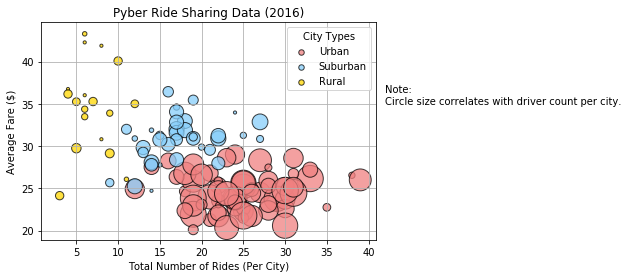

In [4]:
# Obtain the x and y coordinates for each of the three city types
# Groups are city types (Urban, Suburban, Rural)


###-------------------Urban calculations --------------------------
# x coordinate Total Number of rides (per City)
urban_x = urban_df.groupby('city')['ride_id'].count()

# y coordinate average fare ($)
urban_y = urban_df.groupby('city')['fare'].mean()

# # Create dataframe of unique cities to obtain driver_count
unique_urban_df = urban_df.drop_duplicates(subset='city', keep='first')

# driver count per city
urban_drivers = unique_urban_df.groupby('city')['driver_count'].max()


# Build the scatter plots for urban city type
plt.scatter(urban_x, urban_y, marker='o', facecolors='lightcoral', s=urban_drivers*10, edgecolors='black', alpha=0.75)


###-------------------Suburban calculations------------------------
# x coordinate Total Number of rides (per City)
suburban_x = suburban_df.groupby('city')['ride_id'].count()

# y coordinate average fare ($)
suburban_y = suburban_df.groupby('city')['fare'].mean()

# # Create dataframe of unique cities to obtain driver_count
unique_suburban_df = suburban_df.drop_duplicates(subset='city', keep='first')

# driver count per city
suburban_drivers = unique_suburban_df.groupby('city')['driver_count'].max()

# Build the scatter plots for suburban city type
plt.scatter(suburban_x, suburban_y, marker='o', facecolors='lightskyblue', s=suburban_drivers*10, edgecolors='black', alpha=0.75)

###-------------------Rural calculations------------------------
# x coordinate Total Number of rides (per City)
rural_x = rural_df.groupby('city')['ride_id'].count()

# y coordinate average fare ($)
rural_y = rural_df.groupby('city')['fare'].mean()

# # Create dataframe of unique cities to obtain driver_count
unique_rural_df = rural_df.drop_duplicates(subset='city', keep='first')

# driver count per city
rural_drivers = unique_rural_df.groupby('city')['driver_count'].max()


# Build the scatter plots for rural city type
scatter = plt.scatter(rural_x, rural_y, marker='o', facecolors='gold', s=rural_drivers*10, edgecolors='black', linewidth=1, alpha=0.75)
plt.grid()



# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Create a legend
bubble_plot_labels=['Urban', 'Suburban', 'Rural']
legend = plt.legend(loc='upper right', labels=bubble_plot_labels, markerscale=1, title="City Types")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]


# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
# Save Figure
plt.savefig("../Graphs/Pyber_ride_share_bubble.png")



## Total Fares by City Type

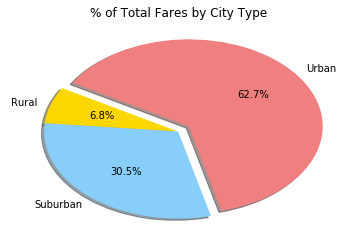

In [5]:
# Calculate Type Percents
total_fares = city_ride_df.groupby('type')['fare'].sum()
colors = ['gold', 'lightskyblue', 'lightcoral']
labels=['Rural', 'Suburban', 'Urban']
# Build Pie Chart
plt.pie(total_fares,
        explode=(0,0,0.1),
        colors = colors,
        startangle=150,
        shadow=True,
        labels=labels,
        autopct='%.1f%%')
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Graphs/total_fares_city.png")


## Total Rides by City Type

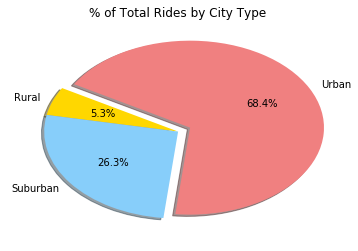

In [6]:
# Calculate Ride Percents
total_rides = city_ride_df.groupby('type')['ride_id'].count()

# Build Pie Chart
plt.pie(total_rides,
       explode = (0,0,0.1),
       labels = labels,
       colors = colors,
       autopct = "%.1f%%",
       startangle = 150,
       shadow = True)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Graphs/total_rides_city.png")


## Total Drivers by City Type

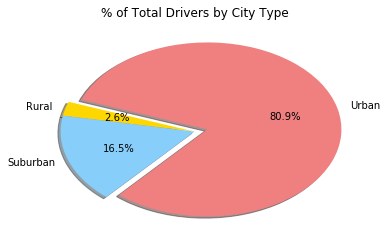

In [7]:
# create dataframe by dropping duplicate cities
unique_cities_df = city_ride_df.drop_duplicates(subset="city", keep="first")

# Calculate Driver Percents

total_drivers = unique_cities_df.groupby('type')['driver_count'].sum()

# Build Pie Charts
plt.pie(total_drivers,
       startangle = 160,
       explode = (0,0,0.1),
       labels = labels,
       colors = colors,
       autopct = "%.1f%%",
       shadow=True)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Graphs/total_drivers_city.png")
